In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import cv2
from random import randint
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    'C:/Users/shiva/OneDrive/Desktop/Dataset/train',  # Path to training data directory
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'C:/Users/shiva/OneDrive/Desktop/Dataset/test',  # Path to testing data directory
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

Found 2609 images belonging to 19 classes.
Found 905 images belonging to 20 classes.


In [7]:
# Load Dataset
path = 'C:/Users/shiva/OneDrive/Desktop/Dataset/train/'
class_names = sorted(os.listdir(path))
num_classes = len(class_names)

img_size = (192, 192, 3)

print('classes: ', class_names)

labels = []
images = []

print('images:\n')
for cl in class_names:
    print(cl, end=' -> ')
    for img in os.listdir(path + cl):
        label = np.zeros(num_classes)
        label[class_names.index(cl)] = 1
        labels.append(label)
        
        image = np.asarray(cv2.resize(cv2.imread(path + cl + '/' + img, cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1])
        images.append(image)
    print('done')

labels = np.asarray(labels)
images = np.asarray(images)

print(f'\n\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')

classes:  ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']
images:

Acne and Rosacea Photos -> done
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions -> done
Atopic Dermatitis Photos -> done
Cellulitis Impetigo and other Bacterial Infections -> done
Eczema Photos -> done
Exanthems and Drug Erupt

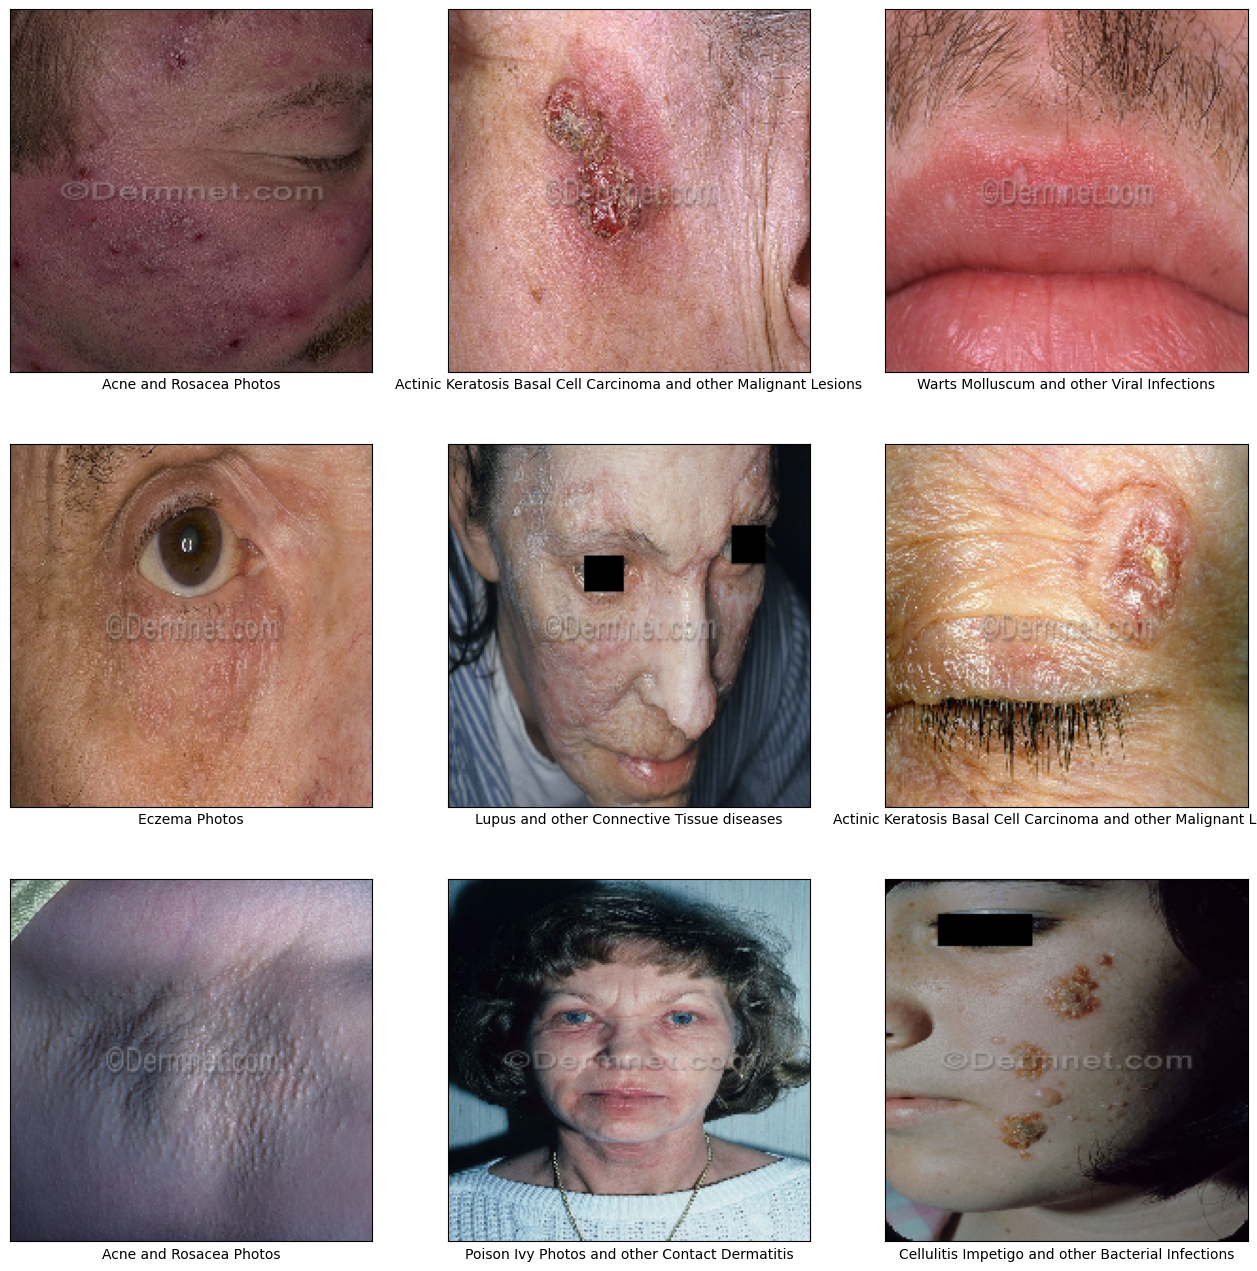

In [8]:
# Display Sample Images
fig, axs = plt.subplots(3, 3, figsize=(16, 16))

for x in range(3):
    for y in range(3):
        i = randint(0, len(images))
        
        axs[x][y].imshow(images[i])
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])
        
plt.show()


In [9]:
# Split Dataset
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.15, random_state=42)
print(f'train images shape: {X_train.shape}\ntrain labels shape: {y_train.shape}\n\nvalidation images shape: {X_val.shape}\nvalidation labels shape: {y_val.shape}\n')


train images shape: (2217, 192, 192, 3)
train labels shape: (2217, 19)

validation images shape: (392, 192, 192, 3)
validation labels shape: (392, 19)



In [10]:
# Define CNN Model
cnn_model = tf.keras.Sequential()

cnn_model.add(tf.keras.layers.Rescaling(scale=1. / 255, input_shape=(img_size)))
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(256, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

cnn_model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()


d:\Anaconda\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 192, 192, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 192, 192, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 192, 192, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 96, 96, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 96, 96, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 96, 96, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 256)    │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 48, 48, 256)    │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 512)    │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 512)    │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 19)             │         1,235 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,021,907 (80.19 MB)

 Trainable params: 21,021,907 (80.19 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train Model
from keras.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint('cnn_model/model_{epoch:02d}.keras')
history = cnn_model.fit(images, labels, epochs=20, validation_data=(X_val, y_val), callbacks=[checkpoint_callback])

Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 385s 5s/step - accuracy: 0.2732 - loss: 2.5614 - val_accuracy: 0.3265 - val_loss: 2.3864
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 324s 4s/step - accuracy: 0.3199 - loss: 2.3560 - val_accuracy: 0.3367 - val_loss: 2.3342
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 332s 4s/step - accuracy: 0.3112 - loss: 2.3007 - val_accuracy: 0.3291 - val_loss: 2.2908
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 306s 4s/step - accuracy: 0.3231 - loss: 2.2307 - val_accuracy: 0.3342 - val_loss: 2.1828
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 324s 4s/step - accuracy: 0.3608 - loss: 2.1538 - val_accuracy: 0.3724 - val_loss: 2.1247
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 3530s 44s/step - accuracy: 0.3604 - loss: 2.1028 - val_accuracy: 0.4031 - val_loss: 2.0075
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1452s 18s/step - accuracy: 0.4052 - loss: 1.9669 - val_accuracy: 0.4184 - val_loss: 1.8631
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 337s 4s/step - accuracy: 0.4501 - loss: 1.7817 - val_accuracy: 0.5893

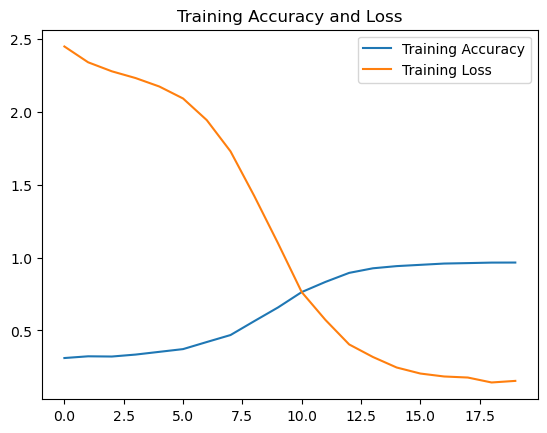

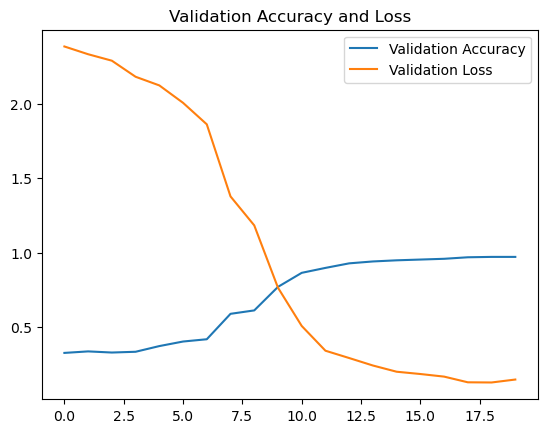

In [15]:

# Plot Training Results
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, loss, label='Training Loss')
plt.legend()
plt.title('Training Accuracy and Loss')

plt.figure()
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Validation Accuracy and Loss')

plt.show()
